# Medical Data Visualizer - Notebook

Let's import our libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data reading

In [2]:
df = pd.read_csv('medical_examination.csv')

### Data Frame information

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Adding overweight column

In [5]:
df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)

df.tail()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,0


#### Normalizing `cholesterol` and `gluc` between 0 and 1

In [6]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['gluc'] == 1, 'gluc'] = 0

df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1

df.tail()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,1,0,0,0,1,0,0


### Preparing the category chart

#### Getting a grouped data frame

In [7]:
df_long = df.melt(id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat = df_long.groupby(['cardio', 'variable', 'value'])["variable"].count()

df_cat

cardio  variable     value
0       active       0         6378
                     1        28643
        alco         0        33080
                     1         1941
        cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        overweight   0        15915
                     1        19106
        smoke        0        31781
                     1         3240
1       active       0         7361
                     1        27618
        alco         0        33156
                     1         1823
        cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        overweight   0        10539
                     1        24440
        smoke        0        32050
                     1         2929
Name: variable, dtype: int64

#### Charting with Seaborn

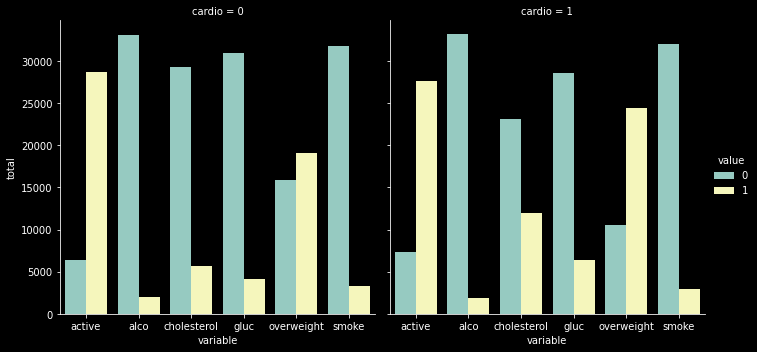

In [8]:
catplot = sns.catplot(
    data=df_cat.reset_index(name="total"), kind="bar", x="variable", y="total", hue="value", col="cardio"
)

### Preparing the correlation heatmap

### Cleaning the data

In [9]:
df_h = df[
    (df["ap_lo"] <= df["ap_hi"])
    & (df["height"] >= df["height"].quantile(0.025))
    & (df["height"] <= df["height"].quantile(0.975))
    & (df["weight"] >= df["weight"].quantile(0.025))
    & (df["weight"] <= df["weight"].quantile(0.975))
]

#### Creating a correlation matrix

In [10]:
df_h_corr = df_h.corr()

#### Plotting the heatmap

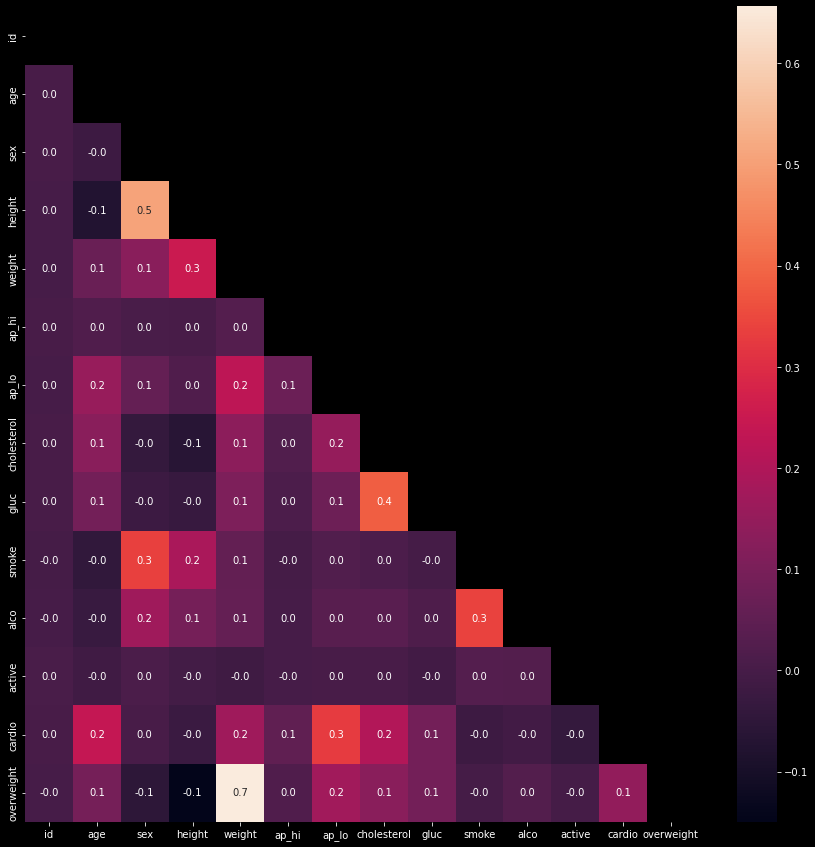

In [11]:
mask = np.triu(df_h_corr)
fig, ax = plt.subplots(figsize=(15,15))
heat_plot = sns.heatmap(df_h_corr, mask=mask, ax=ax, annot=True, fmt='.1f')